# **Project Name - Exploratory Data Analysis of Amazon Prime Video**



# **Project Summary**

This project focuses on performing Exploratory Data Analysis (EDA) on the
Amazon Prime Video dataset to gain insights into the platform’s content
library. The objective is to analyze and understand the characteristics
of movies and TV shows available on Amazon Prime, including content type,
genre trends, ratings, release timelines, and geographical distribution.

The analysis aims to identify meaningful patterns and trends that describe
how content is structured and how it has evolved over time.

### Key Activities Performed:

**Data Acquisition and Preparation:**  
Two datasets related to Amazon Prime Video content were used—one containing
title-level information and another containing credit details. Data
preprocessing steps included handling missing values, removing duplicate
entries, and ensuring overall data quality and consistency.

**Exploratory Visualization:**  
A variety of visualization techniques were applied, such as histograms,
bar charts, box plots, scatter plots, line graphs, pie charts, and violin
plots. These visual tools helped in identifying distributions, trends,
and relationships among different variables in the dataset.

**Insights and Observations:**  
The exploratory analysis led to several important observations:

- Movies constitute a larger portion of the Amazon Prime catalog compared
  to TV shows.
- Genres such as drama and comedy appear most frequently on the platform.
- Movie runtimes show a slight downward trend over the years, whereas
  TV shows generally span multiple seasons.
- Titles released in earlier years tend to have relatively higher ratings
  than more recent releases.
- The majority of content originates from the United States, followed by
  India and the United Kingdom.

Overall, this EDA offers a clearer understanding of Amazon Prime Video’s
content landscape. The findings can assist content creators, platform
planners, and viewers in making informed decisions. Further analysis may
focus on specific genres, regions, or content categories for more detailed
insights.


# **GitHub Link**
https://github.com/Sanju2511/Explaratoty-Analysis-of-Amazon-Prime-TV-Shows-and-Movies

# **Problem Statement**

The purpose of this project is to analyze the content available on Amazon
Prime Video in order to extract meaningful insights from the dataset.
Through exploratory data analysis, the project aims to better understand
how content is distributed and how viewers engage with it.

The key areas addressed in this analysis include:

**Content Variety:**  
Identifying the most common genres and content categories helps in
understanding the level of diversity present on the platform. Analyzing
content variety is important for evaluating Amazon Prime Video’s content
strategy and audience targeting.

**Evolution Over Time:**  
The digital entertainment industry is continuously changing. This project
examines how Amazon Prime Video’s content catalog has evolved over the
years, reflecting shifts in audience preferences and industry trends.

**Viewer Engagement and Ratings:**  
IMDb ratings and popularity indicators provide useful information about
audience response to different titles. By studying these metrics, the
analysis aims to highlight well-performing content as well as areas that
could benefit from improvement.


#**Data Wrangling**

In [162]:
# Load required libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress unnecessary warnings for cleaner output
import warnings
warnings.simplefilter("ignore")


In [163]:
# Load titles dataset from compressed file
titles_df = pd.read_csv("/content/titles.csv.zip")


In [164]:
# Load credits dataset from compressed file
credits_df = pd.read_csv("/content/credits.csv.zip")


In [165]:
# Display column names of the titles dataset
titles_df.columns


Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score'],
      dtype='object')

In [166]:
# Display column names of the credits dataset
credits_df.columns


Index(['person_id', 'id', 'name', 'character', 'role'], dtype='object')

In [167]:
# Combine titles and credits data using the common 'id' field
merged_df = pd.merge(
    titles_df,
    credits_df,
    how="inner",
    on="id"
)


In [168]:
# Preview the merged dataset
merged_df.head()


,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,NaN,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],NaN,tt0017925,8.2,89766.0,8.647,8.0,28713,Marion Mack,Annabelle Lee,ACTOR


In [169]:
# Check the number of rows and columns in the merged dataset
merged_df.shape


(124347, 19)

In [170]:
# Retrieve all column names from the merged dataset
merged_df.columns.tolist()


['id',
 'title',
 'type',
 'description',
 'release_year',
 'age_certification',
 'runtime',
 'genres',
 'production_countries',
 'seasons',
 'imdb_id',
 'imdb_score',
 'imdb_votes',
 'tmdb_popularity',
 'tmdb_score',
 'person_id',
 'name',
 'character',
 'role']

In [171]:
# Display a concise summary of the merged dataset
merged_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

## **Dataset Description**

The dataset used in this project focuses on movies and television shows
available on the Amazon Prime Video platform. It is created by combining
two separate datasets: **titles.csv** and **credits.csv**, which together
provide comprehensive information about content and contributors.

The **titles.csv** file contains metadata related to movies and TV shows,
where each record corresponds to a single title available on the platform.

The **credits.csv** file includes details about individuals involved in
the production of each title, such as actors and directors. Each entry
represents a person’s contribution to a specific movie or show.

### **Dataset Attributes**

Below are the important columns present in the combined dataset:

- **id**: Unique identifier assigned to each movie or TV show  
- **title**: Name of the movie or television series  
- **type**: Indicates whether the content is a *MOVIE* or a *SHOW*  
- **description**: Short summary describing the content  
- **release_year**: Year in which the title was released  
- **age_certification**: Content rating based on age suitability  
- **runtime**: Duration of the movie or episode in minutes  
- **genres**: Categories or genres associated with the title  
- **production_countries**: Countries involved in producing the content  
- **seasons**: Total number of seasons (applicable only for TV shows)  
- **imdb_id**: Unique IMDb identifier for the title  
- **imdb_score**: Average rating of the title on IMDb  
- **imdb_votes**: Number of votes received on IMDb  
- **tmdb_popularity**: Popularity metric obtained from TMDb  
- **tmdb_score**: Rating score provided by TMDb  
- **person_id**: Unique identifier for individuals involved in production  
- **name**: Name of the actor, director, or contributor  
- **character**: Character portrayed by the actor (if applicable)  
- **role**: Role performed in the production, such as ACTOR or DIRECTOR  

This combined dataset enables a detailed exploratory analysis of both
content characteristics and contributor involvement on Amazon Prime Video.


##**Missing values/Null values**

In [172]:
# Identify missing values in each column
merged_df.isna().sum()


,0
id,0
title,0
type,0
description,91
release_year,0
age_certification,67640
runtime,0
genres,0
production_countries,0
seasons,116194


The dataset contains missing values in the **description** column.  
Since this column provides essential information about each title, all rows
with null values in the description field are removed to maintain data quality
and ensure meaningful analysis.


In [173]:
# Remove records where the description field is missing
merged_df = merged_df.dropna(subset=["description"])


In [174]:
# Find the most frequent value in the age_certification column
merged_df["age_certification"].mode().iloc[0]


'R'

In [175]:
# Fill missing age certification values using the most frequent category
most_common_age = merged_df["age_certification"].mode().iloc[0]
merged_df["age_certification"] = merged_df["age_certification"].fillna(most_common_age)


In [176]:
# Recheck missing values after handling nulls
merged_df.isna().sum()


,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,116155


The **seasons** column contains missing values because this attribute applies
only to TV shows. Movies do not have seasons, which naturally results in
null entries for those records.

Rather than dropping these rows, the missing values are replaced with **0**
to indicate that movies have zero seasons. This approach preserves the data
while maintaining logical consistency.


In [177]:
# Assign 0 to missing values in the seasons column
merged_df["seasons"] = merged_df["seasons"].fillna(0)


In [178]:
# Verify remaining missing values in the dataset
merged_df.isna().sum()


,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


The **imdb_id** column serves as a unique identifier for both movies and TV
shows. Records with missing IMDb IDs cannot be reliably used for rating-based
or external reference analysis.

Therefore, all rows containing null values in the **imdb_id** column are
removed to ensure data accuracy and maintain consistency in the analysis.


In [179]:
# Remove rows with missing IMDb identifiers
merged_df = merged_df.dropna(subset=["imdb_id"])


In [180]:
# Check for any remaining missing values after preprocessing
merged_df.isna().sum()


,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


The **imdb_score** column reflects the rating assigned to a movie or TV show.
Removing rows with missing IMDb scores could result in unnecessary data loss
and reduce the overall size of the dataset.

To preserve as much information as possible, the missing values in the
**imdb_score** column are replaced with the **mean IMDb score**. This approach
helps maintain statistical balance while allowing the records to remain part
of the analysis.


In [181]:
# Calculate the average IMDb score rounded to one decimal place
round(merged_df["imdb_score"].mean(), 1)


np.float64(6.0)

In [182]:
# Fill missing IMDb scores using the mean IMDb rating
avg_imdb_score = round(merged_df["imdb_score"].mean(), 1)
merged_df["imdb_score"] = merged_df["imdb_score"].fillna(avg_imdb_score)


In [183]:
# Display the dimensions of the dataset after preprocessing
merged_df.shape


(119022, 19)

The **imdb_votes** column indicates the total number of votes received by a
movie or TV show on IMDb. Missing values in this column often occur when a
title is newly released or has not yet attracted significant audience
attention.

Instead of removing these records, the missing values are replaced with **0**
to represent the absence of votes. This approach helps retain the data while
accurately reflecting low or no viewer engagement.


In [184]:
# Replace missing IMDb vote counts with zero
merged_df["imdb_votes"] = merged_df["imdb_votes"].fillna(0)


In [185]:
# Check remaining missing values after handling imdb_votes
merged_df.isna().sum()


,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


In [186]:
# Compute the average TMDb popularity score (rounded to two decimals)
round(merged_df["tmdb_popularity"].mean(), 2)


np.float64(10.32)

In [187]:
# Fill missing TMDb popularity values using the column mean
avg_popularity = round(merged_df["tmdb_popularity"].mean(), 2)
merged_df["tmdb_popularity"] = merged_df["tmdb_popularity"].fillna(avg_popularity)


In [188]:
# Calculate the mean TMDb rating rounded to one decimal place
round(merged_df["tmdb_score"].mean(), 1)


np.float64(6.0)

In [189]:
# Handle missing TMDb ratings by replacing them with the average score
avg_tmdb_score = round(merged_df["tmdb_score"].mean(), 1)
merged_df["tmdb_score"] = merged_df["tmdb_score"].fillna(avg_tmdb_score)


The **character** column contains missing values where details about the role
played by a person in a movie or TV show are not provided in the dataset.

Since this information is not critical for the core content analysis, the
missing values are replaced with the label **"unknown"**. This ensures
consistency in the dataset while retaining all records for further analysis.


In [190]:
# Replace missing character information with a default label
merged_df["character"] = merged_df["character"].fillna("unknown")


In [191]:
# Final check for missing values across all columns
merged_df.isna().sum()


,0
id,0
title,0
type,0
description,0
release_year,0
age_certification,0
runtime,0
genres,0
production_countries,0
seasons,0


In [192]:
# Display the final shape of the dataset after all preprocessing steps
merged_df.shape


(119022, 19)

##**Check for Duplicate values**

In [193]:
# Count the number of duplicate rows in the dataset
merged_df.duplicated().sum()


np.int64(168)

The dataset contains **duplicate records**, which can lead to biased or
misleading analysis if left untreated. Duplicate entries often occur due to
repeated credit information or multiple references to the same title.

To ensure data accuracy and avoid redundancy, all duplicate rows are removed
from the dataset before proceeding with further analysis.


In [194]:
# Remove duplicate rows from the dataset
merged_df = merged_df.drop_duplicates()


In [195]:
# Verify that no duplicate records remain
merged_df.duplicated().sum()


np.int64(0)

In [196]:
# Display the data types of each column in the dataset
merged_df.dtypes


,0
id,object
title,object
type,object
description,object
release_year,int64
age_certification,object
runtime,int64
genres,object
production_countries,object
seasons,float64


In [197]:
# Generate descriptive statistics for numerical columns
merged_df.describe()


,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id
count,118854.000000,118854.000000,118854.000000,118854.000000,1.188540e+05,118854.000000,118854.000000,1.188540e+05
mean,1995.694592,96.054453,0.153466,5.968800,2.312887e+04,10.334860,5.997704,3.976869e+05
std,28.010517,29.798646,1.006917,1.238147,8.819975e+04,40.786345,1.252196,5.549632e+05
min,1912.000000,1.000000,0.000000,1.100000,0.000000e+00,0.000164,0.800000,1.000000e+00
25%,1980.000000,83.000000,0.000000,5.200000,2.790000e+02,1.917000,5.400000,3.821300e+04
50%,2009.000000,94.000000,0.000000,6.000000,1.227000e+03,3.960000,6.000000,1.323810e+05
75%,2017.000000,109.000000,0.000000,6.800000,7.040000e+03,8.924000,6.800000,5.633935e+05
max,2022.000000,328.000000,49.000000,9.900000,1.133692e+06,1437.906000,10.000000,2.371153e+06


After completing the preprocessing steps, the dataset is now clean and
prepared for further exploratory analysis. All major data quality issues
have been addressed to ensure consistency and reliability.

The key preprocessing steps performed are summarized below:

1. **Data Ingestion and Integration:**  
   Two datasets, namely *titles.csv* and *credits.csv*, were loaded and
   combined into a single dataset using the common identifier column **id**.

2. **Missing Value Treatment:**  
   - Records with missing values in the **description** and **imdb_id**
     columns were removed, as these fields are essential for analysis.
   - Missing values in the **age_certification** column were filled using
     the most frequently occurring value (mode).
   - The **seasons**, **imdb_votes**, and **character** columns had their
     missing values replaced with logical defaults of `0`, `0`, and
     `"unknown"` respectively.
   - Numerical columns such as **imdb_score**, **tmdb_popularity**, and
     **tmdb_score** were imputed using their respective mean values.

3. **Duplicate Removal:**  
   Duplicate entries were identified and eliminated to avoid redundancy
   and ensure unbiased analysis.

With these preprocessing steps completed, the dataset is now suitable for
performing detailed exploratory data analysis and visualization.


#**Data Vizualization**

Data visualization refers to the process of presenting data in a graphical
format to make complex information easier to understand. Visual elements
such as charts, graphs, and plots allow analysts to quickly identify
patterns, trends, and anomalies within the data.

By converting numerical data into visual representations, data visualization
helps improve interpretability and supports better decision-making.


##**Univariate Analysis**

In [198]:
merged_df

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
0,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,59401,Joe Besser,Joe,ACTOR
1,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31460,Moe Howard,Moe,ACTOR
2,ts20945,The Three Stooges,SHOW,The Three Stooges were an American vaudeville ...,1934,TV-PG,19,"['comedy', 'family', 'animation', 'action', 'f...",['US'],26.0,tt0850645,8.6,1092.0,15.424,7.6,31461,Larry Fine,Larry,ACTOR
3,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,R,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,21174,Buster Keaton,Johnny Gray,ACTOR
4,tm19248,The General,MOVIE,"During America’s Civil War, Union spies steal ...",1926,R,78,"['action', 'drama', 'war', 'western', 'comedy'...",['US'],0.0,tt0017925,8.2,89766.0,8.647,8.0,28713,Marion Mack,Annabelle Lee,ACTOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124342,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,R,72,"['family', 'drama']",[],0.0,tt14331982,8.4,49.0,0.645,6.0,1938589,Sangam Shukla,Madhav,ACTOR
124343,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,R,72,"['family', 'drama']",[],0.0,tt14331982,8.4,49.0,0.645,6.0,1938565,Vijay Thakur,Sanjay Thakur,ACTOR
124344,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,R,72,"['family', 'drama']",[],0.0,tt14331982,8.4,49.0,0.645,6.0,728899,Vanya Wellens,Budhiya,ACTOR
124345,tm1054116,Baikunth,MOVIE,"This story is about prevalent caste problem, e...",2021,R,72,"['family', 'drama']",[],0.0,tt14331982,8.4,49.0,0.645,6.0,1938620,Vishwa Bhanu,Gissu,ACTOR


###**BOX PLOT**

#### **Box Plot of IMDb Scores**

A box plot is used to display the distribution and variability of IMDb
ratings in the dataset. It provides a clear summary of the median, quartiles,
and potential outliers, helping to understand the spread and central tendency
of the ratings.


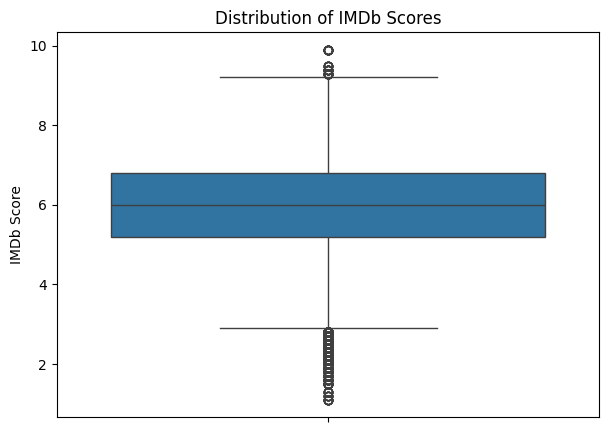

In [199]:
# Visualize the distribution of IMDb ratings using a box plot
plt.figure(figsize=(7, 5))
sns.boxplot(y=merged_df["imdb_score"])
plt.title("Distribution of IMDb Scores", fontsize=12)
plt.ylabel("IMDb Score")
plt.show()


**Insights**

- The line inside the box indicates the **median IMDb score**, which represents
  the typical rating received by movies and TV shows available on Amazon Prime.
- Data points that appear beyond the whiskers are treated as **outliers**.
  These correspond to titles with unusually high or low IMDb ratings compared
  to the majority of the content on the platform.


####**Box plot of runtime**

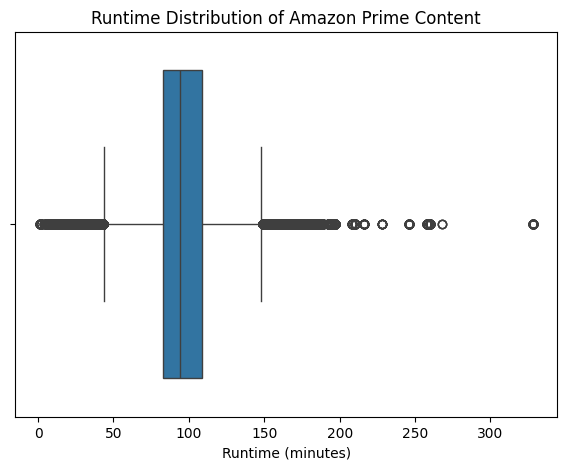

In [200]:
# Display the distribution of content runtime using a box plot
plt.figure(figsize=(7, 5))
sns.boxplot(x=merged_df["runtime"])
plt.title("Runtime Distribution of Amazon Prime Content", fontsize=12)
plt.xlabel("Runtime (minutes)")
plt.show()


**Insights**

- The box plot of runtime provides an overview of how content durations are
  distributed across movies and TV shows on Amazon Prime.
- The line inside the box indicates the **median runtime**, which is
  approximately **90 minutes**, representing the typical duration of most
  titles.
- Values appearing beyond the whiskers are treated as **outliers**. These
  correspond to content with unusually short or long runtimes when compared
  to the majority of the dataset.


### **Histogram**

A histogram is used to visualize the distribution of a numerical variable.
It helps in understanding how values are spread across different ranges and
reveals the overall shape of the data, such as skewness or concentration
around certain values.


####**Histogram of release_year**

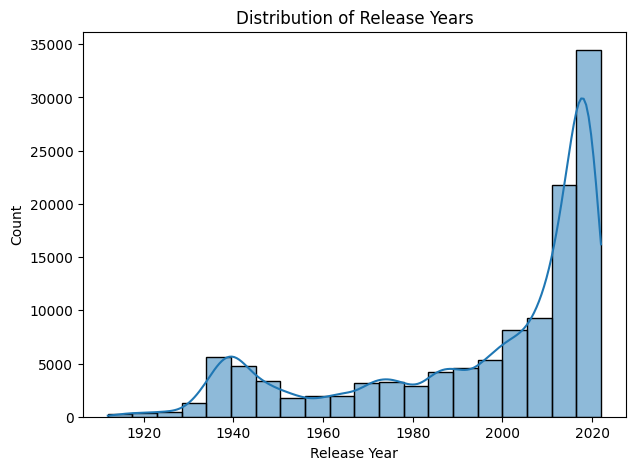

In [201]:
# Visualize the distribution of content release years
plt.figure(figsize=(7, 5))
sns.histplot(
    merged_df["release_year"],
    bins=20,
    kde=True
)
plt.title("Distribution of Release Years")
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.show()


**Insights**

- The histogram illustrates how movies and TV shows are distributed across
  different release years on Amazon Prime Video.
- A significant portion of the content has been released in the **last
  decade**, indicating a higher concentration of recent titles. The
  distribution shows a left-skewed pattern.
- An overall upward trend in content releases can be observed over time,
  suggesting continuous growth and expansion of Amazon Prime Video’s content
  library.


####**Histogram of runtime**

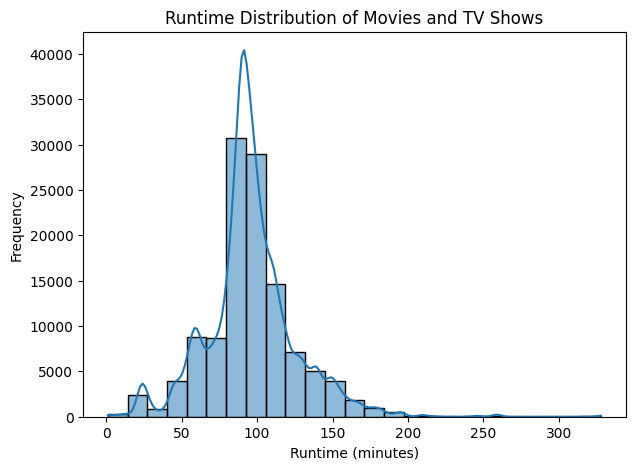

In [202]:
# Plot the distribution of runtimes for Amazon Prime content
plt.figure(figsize=(7, 5))
sns.histplot(
    merged_df["runtime"],
    bins=25,
    kde=True
)
plt.title("Runtime Distribution of Movies and TV Shows")
plt.xlabel("Runtime (minutes)")
plt.ylabel("Frequency")
plt.show()


**Insights**

- The histogram indicates that the runtime distribution of movies and TV
  shows on Amazon Prime does not follow a normal pattern. Instead, it is
  **right-skewed**, with a longer tail extending toward higher runtime values.
- The highest concentration of titles falls within the **70–90 minute**
  range, suggesting this is the most common runtime for content on the
  platform.
- A large number of movies and TV shows have runtimes between **60 and
  100 minutes**, which may represent an optimal duration that balances
  storytelling depth with viewer engagement.


####**Histogram of seasons**


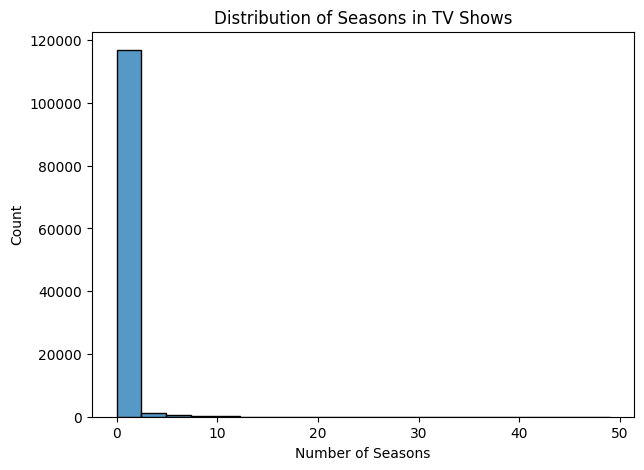

In [203]:
# Visualize the distribution of number of seasons for TV shows
plt.figure(figsize=(7, 5))
sns.histplot(
    merged_df["seasons"],
    bins=20
)
plt.title("Distribution of Seasons in TV Shows")
plt.xlabel("Number of Seasons")
plt.ylabel("Count")
plt.show()


**Insights**

- The histogram shows a prominent peak at **1 season**, which is expected
  because the seasons attribute applies only to TV shows, while movies have
  zero seasons.
- Most TV shows available on Amazon Prime have between **1 and 3 seasons**.
  This indicates that a large number of series do not extend across many
  seasons and are relatively short-running.


####**Histogram of imdb score**

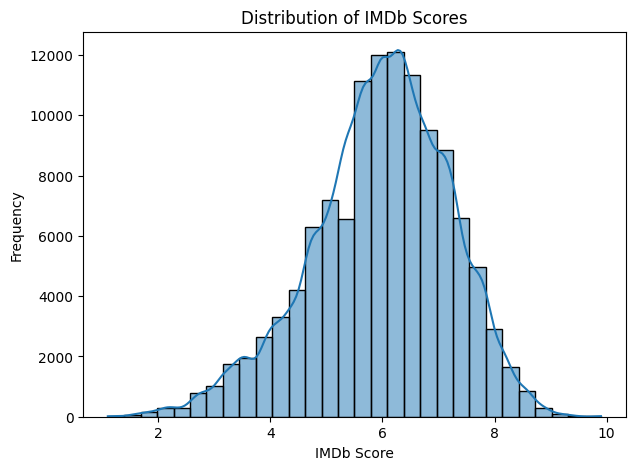

In [204]:
# Plot the distribution of IMDb ratings
plt.figure(figsize=(7, 5))
sns.histplot(
    merged_df["imdb_score"],
    bins=30,
    kde=True
)
plt.title("Distribution of IMDb Scores")
plt.xlabel("IMDb Score")
plt.ylabel("Frequency")
plt.show()


**Insights**

- The histogram indicates that IMDb scores are distributed in a roughly
  **normal pattern**, with most values concentrated around the center.
- The majority of movies and TV shows on Amazon Prime have IMDb ratings in
  the **6 to 7 range**, suggesting that the overall content quality on the
  platform can be considered fairly good.


### **Bar Plot / Count Plot**

A bar plot is a graphical representation used to display **categorical
variables**. Each bar represents a category, and its height or length
corresponds to the frequency or count of observations within that category.
Bar plots are especially useful for comparing distributions across different
groups.


####**Bar plot of type(Movie or TV show)**

In [205]:
# Count the number of movies and TV shows
content_type_counts = merged_df["type"].value_counts()
content_type_counts


,count
type,
MOVIE,111454
SHOW,7400


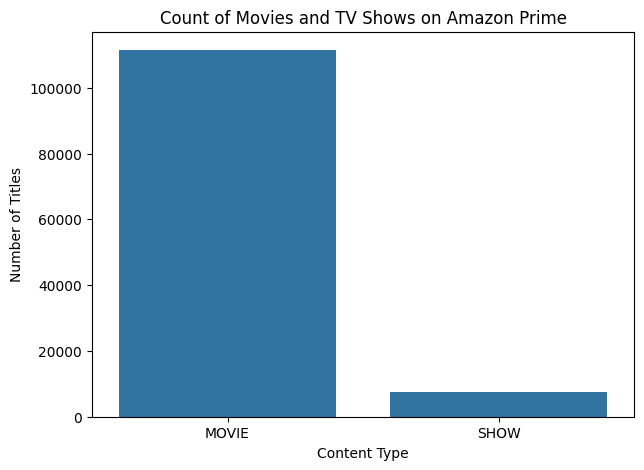

In [206]:
# Visualize the count of Movies and TV Shows
plt.figure(figsize=(7, 5))
sns.barplot(
    x=content_type_counts.index,
    y=content_type_counts.values
)
plt.title("Count of Movies and TV Shows on Amazon Prime")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")
plt.show()


**Insights**

- The bar representing **Movies** is noticeably higher than that of **TV
  Shows**, indicating that movies make up a larger portion of the Amazon
  Prime Video content library.
- This suggests that Amazon Prime places greater emphasis on movie content,
  possibly reflecting higher viewer preference or demand for movies on the
  platform.
- These observations can be useful for content creators and producers, as
  focusing on movie releases may offer better visibility and reach on Amazon
  Prime Video.


####**Bar plot of age certification**

In [207]:
# Count occurrences of each age certification category
age_rating_counts = merged_df["age_certification"].value_counts()
age_rating_counts


,count
age_certification,
R,88755
PG-13,12302
PG,9437
G,3674
TV-MA,1712
TV-14,1478
TV-PG,494
TV-Y7,353
TV-Y,293


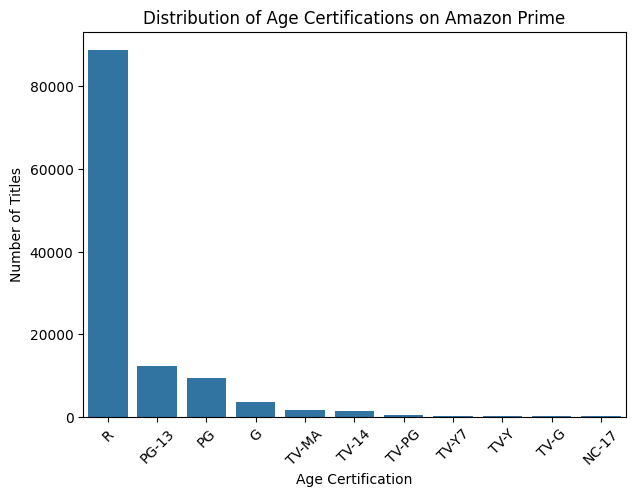

In [208]:
# Visualize the distribution of age certification categories
plt.figure(figsize=(7, 5))
sns.barplot(
    x=age_rating_counts.index,
    y=age_rating_counts.values
)
plt.title("Distribution of Age Certifications on Amazon Prime")
plt.xlabel("Age Certification")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.show()


**Insights**

- The **R** age certification, which indicates that viewers under 17 require
  parental or adult supervision, has the highest number of titles on Amazon
  Prime Video.
- Content rated **PG-13** appears as the second most common category. These
  titles may include material that is not suitable for younger children and
  typically require parental guidance for viewers below 13 years of age.
- This distribution suggests that content aimed at a more mature audience
  receives strong engagement. As a result, creators may consider focusing on
  content within the **R** rating category due to its higher presence and
  audience interest on the platform.


####**Bar plot of genres**

In [209]:
# Count the frequency of each genre and filter genres with higher occurrence
genre_freq = merged_df["genres"].value_counts()
popular_genres = genre_freq[genre_freq > 1500]

popular_genres


,count
genres,
['drama'],8639
['comedy'],5014
"['drama', 'romance']",2501
['horror'],2050
['documentation'],2027
"['drama', 'comedy']",1937
"['comedy', 'drama']",1935
"['romance', 'comedy']",1622
"['comedy', 'romance']",1605


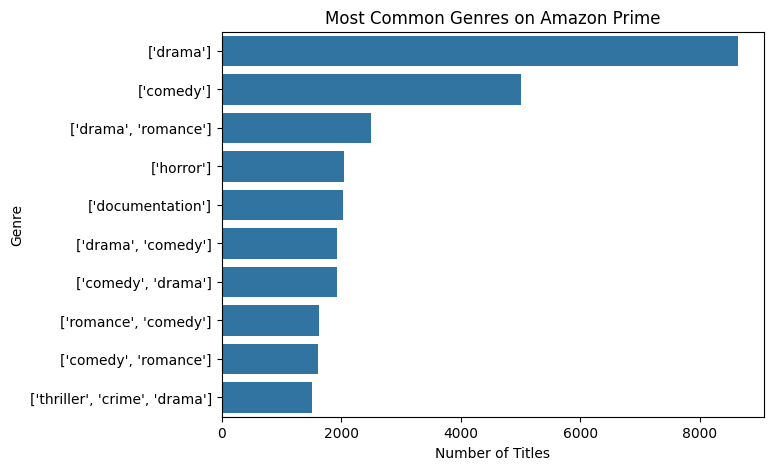

In [210]:
# Display the most frequent genres using a horizontal bar chart
plt.figure(figsize=(7, 5))
sns.barplot(
    y=popular_genres.index,
    x=popular_genres.values
)
plt.title("Most Common Genres on Amazon Prime")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.show()


**Insights**

- Genres such as **Drama** and **Comedy** have the highest frequencies,
  indicating that they are the most dominant categories on Amazon Prime
  Video. This dominance also reflects strong viewer interest in these genres.
- Although a few genres appear more frequently, the platform still offers
  content across a wide range of genres, highlighting diversity in content
  selection and catering to varied audience preferences.
- Understanding genre distribution is useful for improving content
  recommendations and helping viewers discover titles that match their
  interests.


####**Bar plot of production countries**

In [211]:
# Analyze content count by production country and filter major contributors
country_freq = merged_df["production_countries"].value_counts()
top_countries = country_freq[country_freq > 1000]

top_countries


,count
production_countries,
['US'],66793
['IN'],10625
['GB'],6779
['CA'],3055
['JP'],1917
[],1795
['AU'],1591
['FR'],1474
"['CA', 'US']",1170


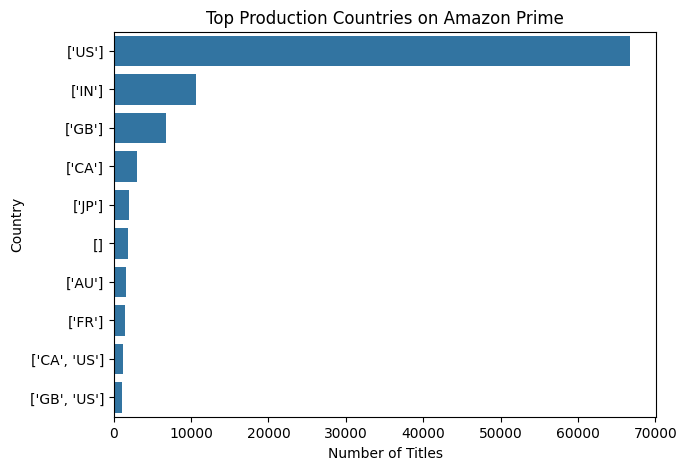

In [212]:
# Visualize major content-producing countries on Amazon Prime
plt.figure(figsize=(7, 5))
sns.barplot(
    x=top_countries.values,
    y=top_countries.index
)
plt.title("Top Production Countries on Amazon Prime")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.show()


**Insights**

- The **United States** emerges as the leading contributor, producing the
  largest share of content available on Amazon Prime Video.
- **India** and the **United Kingdom (GB)** follow as major contributors,
  highlighting their strong roles in global film and television production
  and their significant presence on the platform.


####**Bar plot of average rating for each age certification**

In [213]:
# Compute average IMDb score for each age certification category
avg_rating_by_cert = (
    merged_df
    .groupby("age_certification")["imdb_score"]
    .mean()
    .sort_values(ascending=False)
)

avg_rating_by_cert


,imdb_score
age_certification,
TV-PG,7.486437
TV-MA,7.376811
TV-14,7.337348
TV-Y7,6.782153
TV-G,6.619167
TV-Y,6.445734
PG-13,6.112396
PG,6.104737
G,6.043114


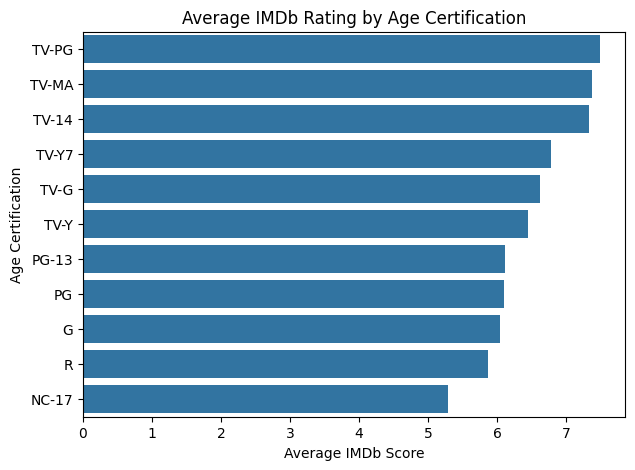

In [214]:
# Visualize the average IMDb rating across age certification categories
plt.figure(figsize=(7, 5))
sns.barplot(
    x=avg_rating_by_cert.values,
    y=avg_rating_by_cert.index
)
plt.title("Average IMDb Rating by Age Certification")
plt.xlabel("Average IMDb Score")
plt.ylabel("Age Certification")
plt.show()


**Insights**

- Age certification categories such as **TV-PG** and **TV-MA** show higher
  average IMDb ratings. This indicates that content aimed at mature audiences
  often receives stronger viewer appreciation compared to content designed
  for younger age groups.
- The bar plot reflects audience preferences across different certification
  levels. While higher-rated titles tend to be oriented toward mature viewers,
  audiences seeking family-friendly content may find comparatively lower-rated
  options within those categories.


##**Bivariate Analysis**

### **Scatter Plot**

A scatter plot is a visualization technique used to display the relationship
between two numerical variables. Each point on the plot represents an
individual observation, making it useful for identifying patterns,
correlations, or trends between variables.


####**Scatter plot of imdb_vote and imdb_scores**



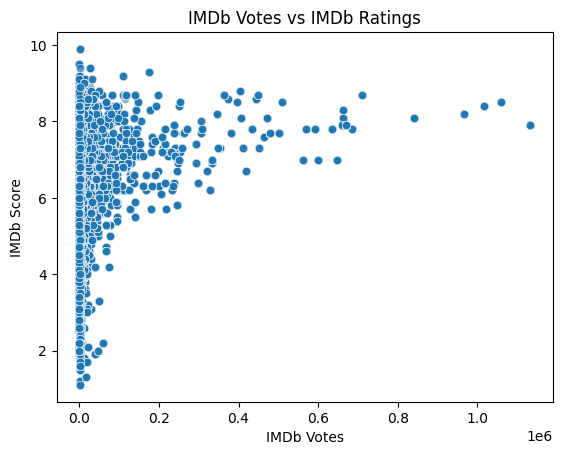

In [215]:
# Examine the relationship between IMDb votes and IMDb ratings
sns.scatterplot(
    data=merged_df,
    x="imdb_votes",
    y="imdb_score",
    alpha=0.5
)
plt.title("IMDb Votes vs IMDb Ratings")
plt.xlabel("IMDb Votes")
plt.ylabel("IMDb Score")
plt.show()


**Insights**

- The scatter plot indicates a **positive relationship** between the number of
  IMDb votes and the IMDb score. As the vote count increases, ratings generally
  tend to be higher.
- This trend suggests that titles with greater audience engagement are often
  more popular and receive better overall ratings, reflecting stronger viewer
  approval.


### **Line Plot**

A line plot is used to represent changes or trends in data over a continuous
variable, most commonly time. By connecting individual data points with
lines, it becomes easier to observe overall patterns, increases, or
decreases across a sequence.


####**line plot of runtime v/s release_year**

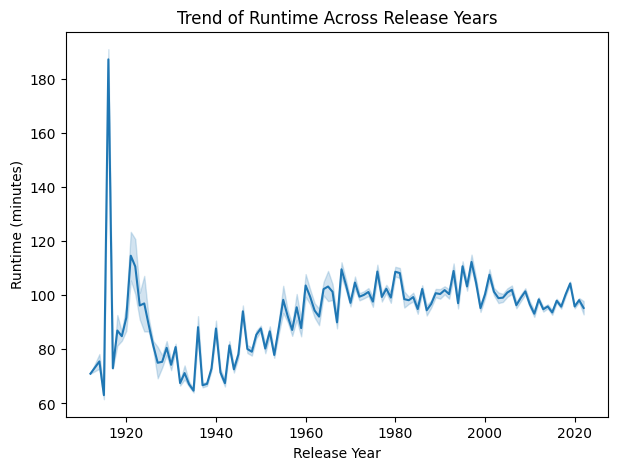

In [216]:
# Analyze how average runtime has changed over the years
plt.figure(figsize=(7, 5))
sns.lineplot(
    data=merged_df,
    x="release_year",
    y="runtime"
)
plt.title("Trend of Runtime Across Release Years")
plt.xlabel("Release Year")
plt.ylabel("Runtime (minutes)")
plt.show()


**Insights**

- The line plot reveals a **gradual decline** in the average runtime of movies
  and TV shows over the years, indicating that content durations have become
  slightly shorter over time.
- In earlier periods, titles generally had longer runtimes, whereas more
  recent releases tend to be comparatively shorter in length.
- This reduction in runtime may be influenced by factors such as changing
  viewer attention patterns, evolving content consumption habits, and
  considerations related to production costs.


####**line plot of seasons v/s release_year**

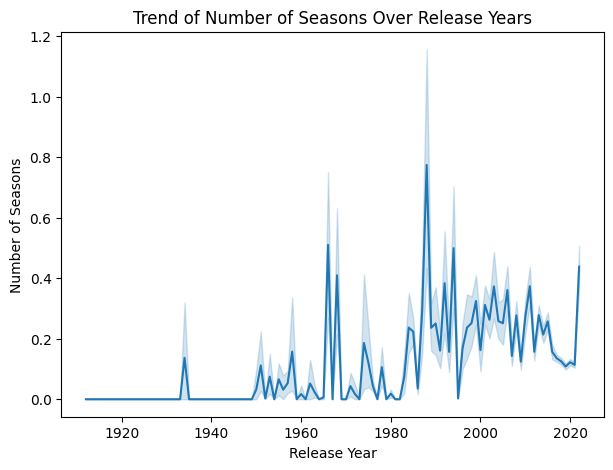

In [217]:
# Examine how the number of seasons has varied over the years
plt.figure(figsize=(7, 5))
sns.lineplot(
    data=merged_df,
    x="release_year",
    y="seasons"
)
plt.title("Trend of Number of Seasons Over Release Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Seasons")
plt.show()


**Insights**

- The line plot shows a clear **increasing trend** in the number of seasons
  over time, indicating that TV shows are being produced with more seasons
  in recent years.
- This upward pattern suggests that viewers are increasingly willing to
  invest time in longer-running series, reflecting sustained audience
  interest and engagement with multi-season content.


####**line plot of imdb_score v/s release_year**

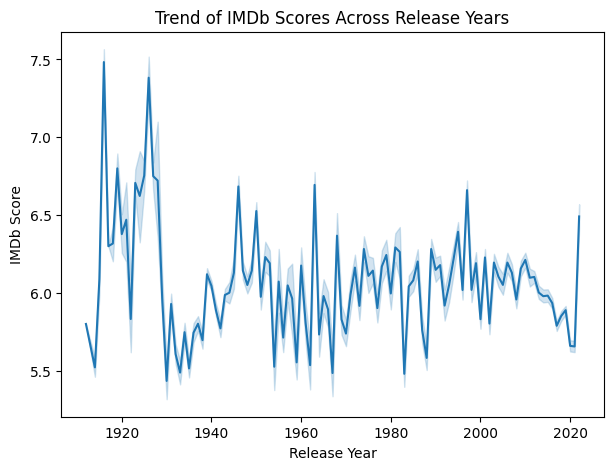

In [218]:
# Observe how IMDb ratings have changed over time
plt.figure(figsize=(7, 5))
sns.lineplot(
    data=merged_df,
    x="release_year",
    y="imdb_score"
)
plt.title("Trend of IMDb Scores Across Release Years")
plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.show()


**Insights**

- The line plot shows a **slight decline** in average IMDb scores over time,
  indicating that older titles on Amazon Prime generally have marginally
  higher ratings compared to more recent releases.
- This trend may be influenced by multiple factors, including shifts in
  audience preferences, changes in content creation styles, and increased
  competition within the streaming industry.


####**line plot of tmdb_score v/s release_year**

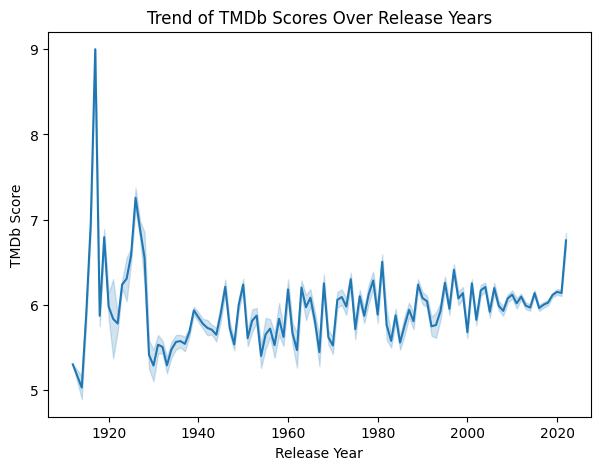

In [219]:
# Analyze how TMDb ratings have varied over the years
plt.figure(figsize=(7, 5))
sns.lineplot(
    data=merged_df,
    x="release_year",
    y="tmdb_score"
)
plt.title("Trend of TMDb Scores Over Release Years")
plt.xlabel("Release Year")
plt.ylabel("TMDb Score")
plt.show()


**Insights**

- The line plot indicates a **gradual decrease** in average TMDb scores over
  the years, suggesting that older movies and TV shows on Amazon Prime tend
  to receive slightly higher TMDb ratings than more recent releases.
- This pattern may be influenced by factors such as changing audience
  preferences, evolving production techniques, and growing competition in
  the streaming content landscape.


###**PIE CHART**

Pie chart is used to visualize the proportions of different categories within a whole dataset. It's circular statistical graph, where each slice of the pie represents a category, and the size of the slice is proportional to the category's contribution to the overall data.

####**Pie chart of type(Movie or TV show)**

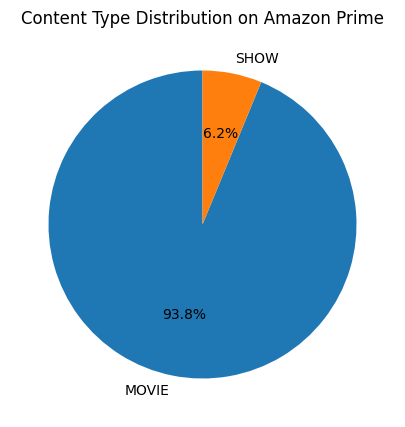

In [220]:
# Display the proportion of Movies and TV Shows using a pie chart
plt.figure(figsize=(7, 5))

type_distribution = merged_df["type"].value_counts()

plt.pie(
    type_distribution.values,
    labels=type_distribution.index,
    autopct="%.1f%%",
    startangle=90
)

plt.title("Content Type Distribution on Amazon Prime")
plt.show()


**Insights**

- The larger slice representing **Movies** shows that Amazon Prime Video
  places a stronger emphasis on movie content within its platform.
- This distribution suggests that the platform is particularly appealing to
  viewers who prefer watching movies rather than long-form TV series.


####**Pie chart of age certification**

In [221]:
# Get the frequency distribution of age certification categories
age_cert_counts = merged_df["age_certification"].value_counts()
age_cert_counts


,count
age_certification,
R,88755
PG-13,12302
PG,9437
G,3674
TV-MA,1712
TV-14,1478
TV-PG,494
TV-Y7,353
TV-Y,293


In [222]:
# Interactive pie chart showing distribution of age certifications
import plotly.express as px

age_cert_dist = merged_df["age_certification"].value_counts().reset_index()
age_cert_dist.columns = ["Age Certification", "Count"]

fig = px.pie(
    age_cert_dist,
    values="Count",
    names="Age Certification",
    title="Age Certification Distribution on Amazon Prime"
)

fig.show()


**Insights**

- The age certification **R** appears most frequently, indicating that a large
  share of Amazon Prime Video’s content is targeted toward a mature audience.
- Understanding the distribution of age ratings can help improve content
  recommendations by aligning suggestions with user age preferences and
  viewing habits.


### **Violin Plot**

A violin plot is a statistical visualization that merges features of a box
plot with a density plot. It is used to display the distribution of a
numerical variable across different categories, showing both the spread of
the data and its probability density.


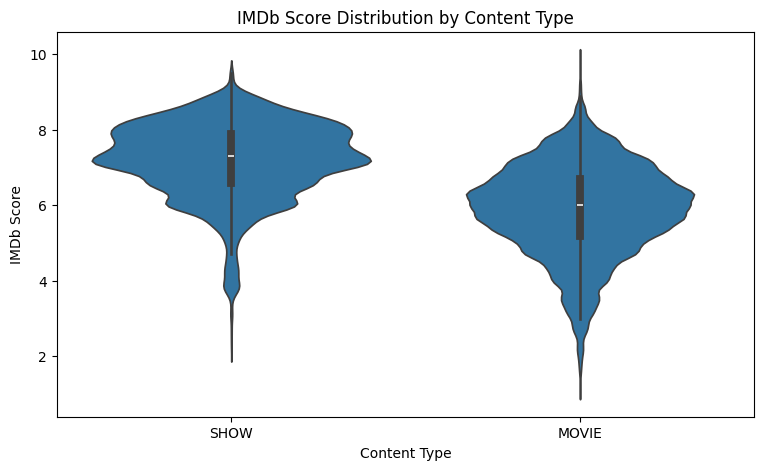

In [223]:
# Compare IMDb score distribution across content types using a violin plot
plt.figure(figsize=(9, 5))
sns.violinplot(
    data=merged_df,
    x="type",
    y="imdb_score"
)
plt.title("IMDb Score Distribution by Content Type")
plt.xlabel("Content Type")
plt.ylabel("IMDb Score")
plt.show()


**Insights**

- **Movies:** The violin plot shows that IMDb scores for movies are most
  densely concentrated between **6 and 7**, indicating that a majority of
  movies on Amazon Prime receive reasonably good ratings.
- **TV Shows:** In contrast, TV shows exhibit a higher concentration of IMDb
  scores in the **7 to 8** range, suggesting stronger audience appreciation
  for series content.
- The median IMDb score (represented by the central marker within each
  violin) is slightly higher for **TV shows** than for **movies**. This
  implies that, on average, TV shows on Amazon Prime tend to achieve better
  ratings compared to movies.


##**Multivariable Analysis**


### **Pair Plot**

A pair plot is a visualization technique used to examine **pairwise
relationships** between multiple numerical variables in a dataset. It
typically displays scatter plots for variable combinations and histograms
or density plots along the diagonal to show individual variable
distributions.

Pair plots are helpful for identifying correlations, patterns, and
potential relationships across features.


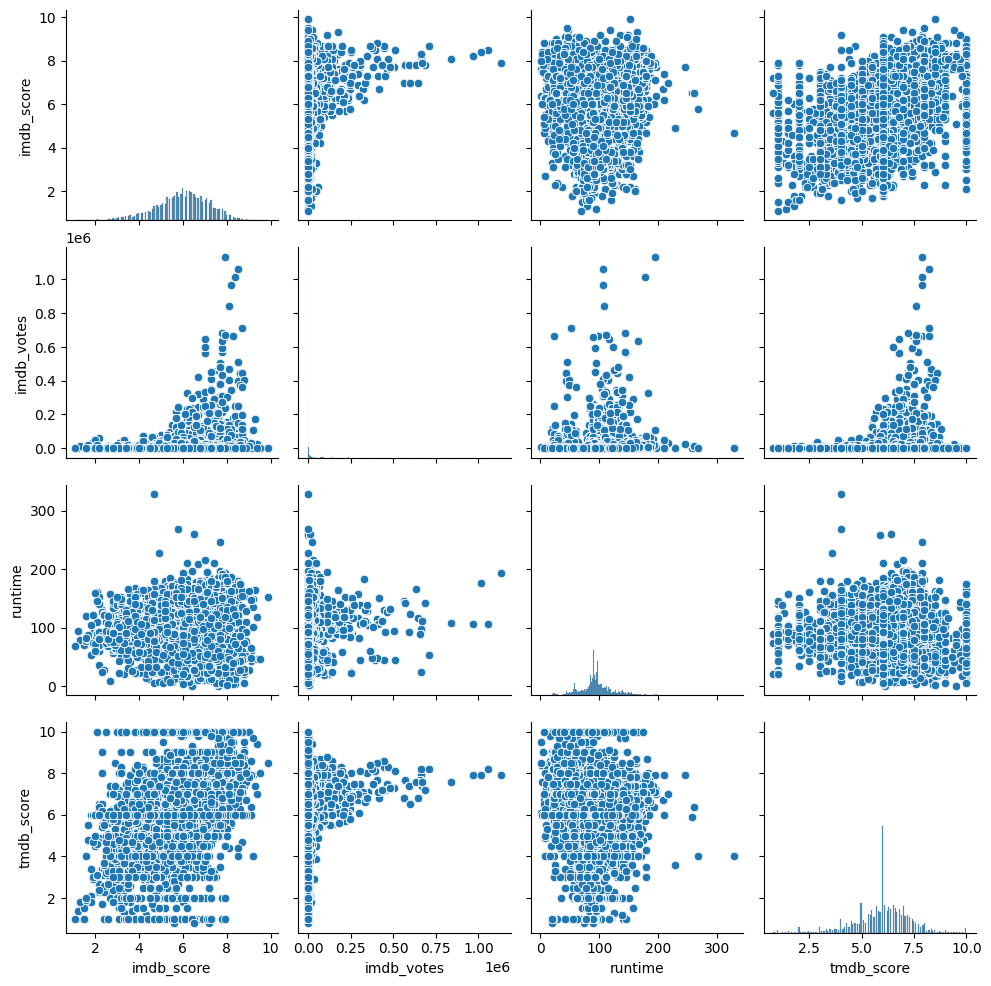

In [224]:
# Visualize pairwise relationships among selected numerical features
sns.pairplot(
    merged_df[["imdb_score", "imdb_votes", "runtime", "tmdb_score"]]
)
plt.show()


### **Heatmap**

A heatmap is a visualization technique that represents the **magnitude of
relationships** between numerical variables using color intensity. It is
commonly used to display correlation values, where stronger relationships
are highlighted through darker or more intense colors.

Heatmaps make it easier to quickly identify patterns, associations, and
dependencies among variables in a dataset.


In [225]:
# Select only numerical columns from the dataset
numeric_features = merged_df.select_dtypes(include=["int64", "float64"])


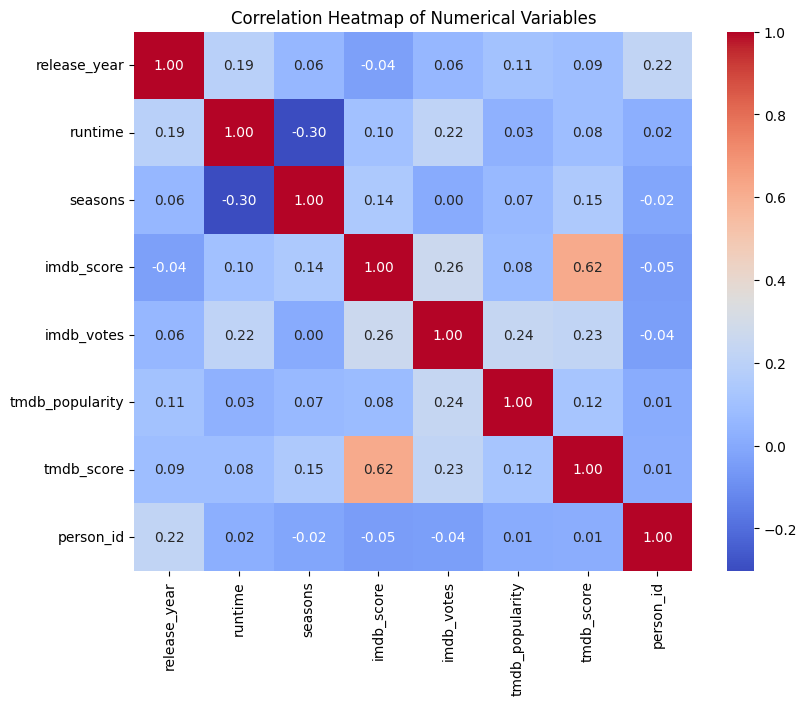

In [226]:
# Display correlation heatmap for numerical features
plt.figure(figsize=(9, 7))
correlation_matrix = numeric_features.corr()

sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)

plt.title("Correlation Heatmap of Numerical Variables")
plt.show()


#**Conclusion**

## **Conclusion**

This Exploratory Data Analysis (EDA) project on the Amazon Prime Video dataset
has provided meaningful insights into the platform’s content composition,
production trends, and audience engagement patterns.

The analysis shows that **movies form a larger share of the platform’s
library compared to TV shows**, indicating a stronger focus on movie-based
content. Genre analysis highlights **Drama and Comedy** as the most dominant
categories, reflecting strong audience demand, while the presence of many
other genres demonstrates Amazon Prime Video’s commitment to content
diversity.

Trend analysis over release years reveals notable changes in content
characteristics. While the **average runtime of movies has gradually
decreased**, TV shows have exhibited an **increase in the number of
seasons**, suggesting growing viewer interest in longer-running series.
This shift points toward evolving consumption habits and engagement styles.

Rating-based analysis using **IMDb and TMDb scores** indicates that **older
titles generally receive higher ratings** compared to more recent releases.
This pattern may be influenced by factors such as nostalgic appeal, changing
viewer expectations, or increased competition in modern content production.

From a regional perspective, the **United States emerges as the largest
content contributor**, followed by **India and the United Kingdom**, showing
their significant roles in shaping Amazon Prime Video’s content catalog.

Overall, this EDA successfully uncovers key trends and patterns within the
Amazon Prime Video dataset. The findings can support decision-making for
content creators, platform strategists, and viewers. Future work may include
comparative analysis with other OTT platforms, genre-specific deep dives, or
the application of predictive models and recommendation systems for enhanced
insights.
